In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


In [2]:
from basic_preprocessing import *
from image_preprocessing import *

In [3]:
%cd C:\Users\yukir\Documents\Monicas_workspace\Sign detection\image_input

C:\Users\yukir\Documents\Monicas_workspace\Sign detection\image_input


### Image load

(200, 200, 3)


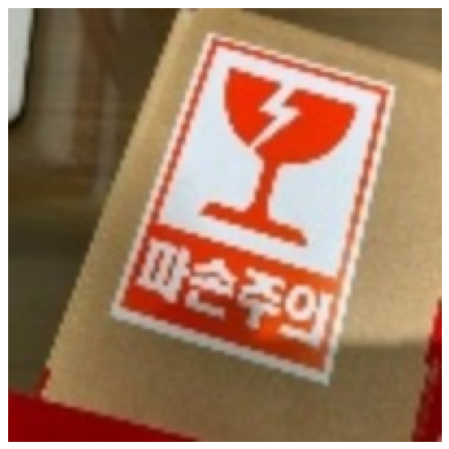

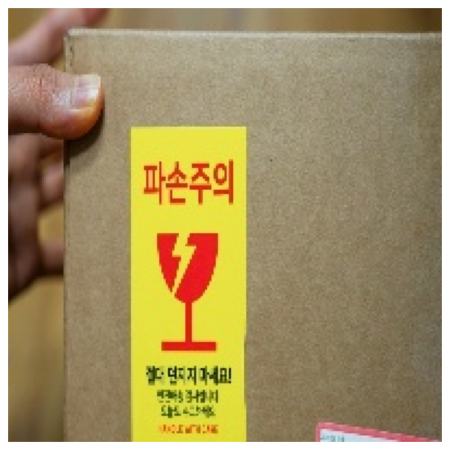

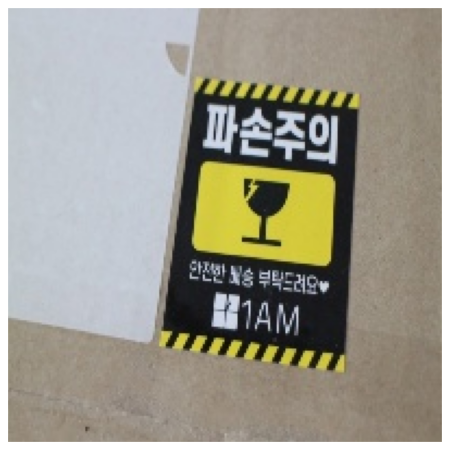

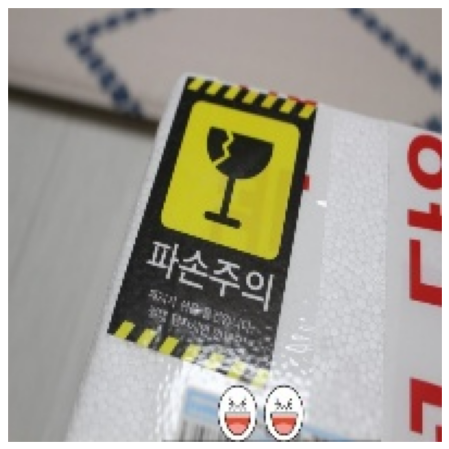

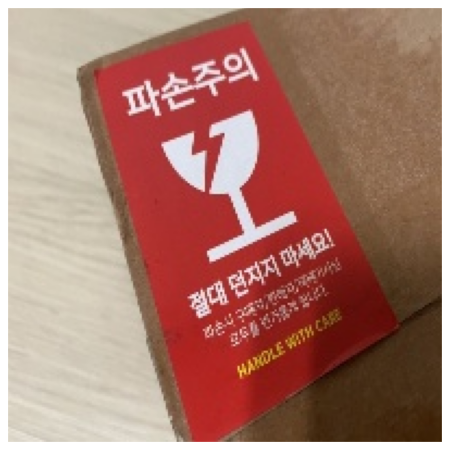

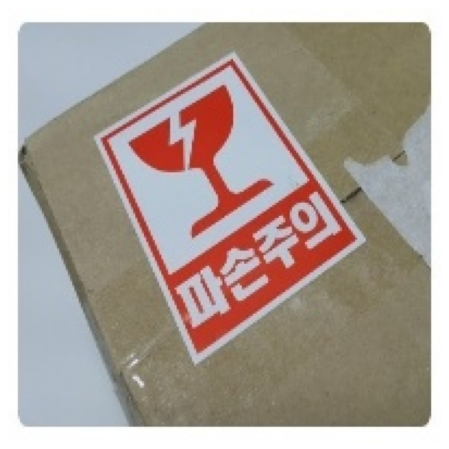

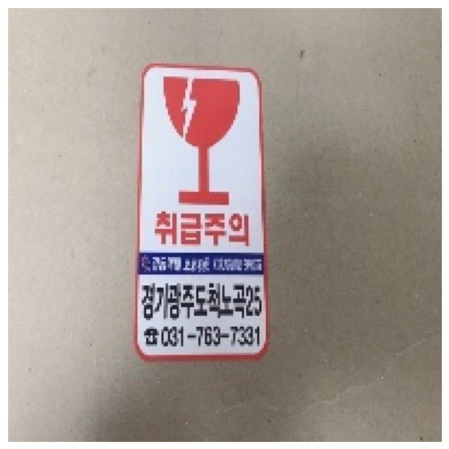

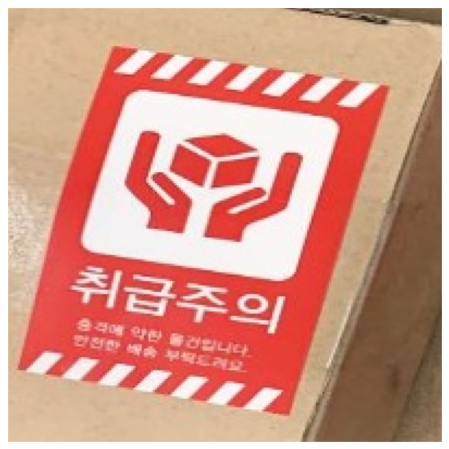

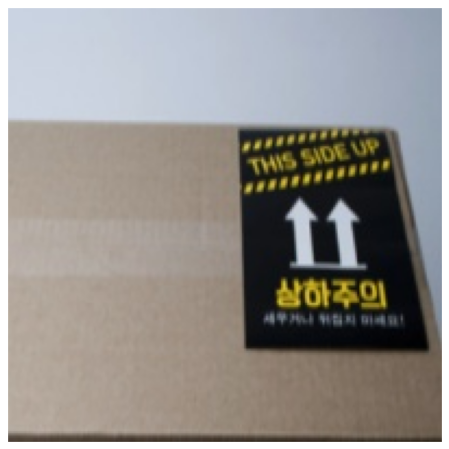

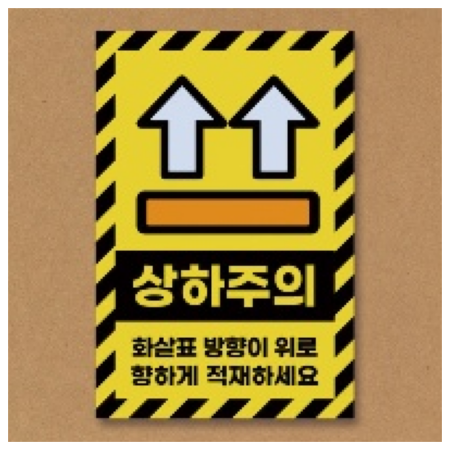

In [4]:
img_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\image_input\\image'
img_list = get_file_list(img_path)
img_list = get_img(img_path)
print(img_list[1].shape)
for i in img_list:
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    show(i)

## Edge detection

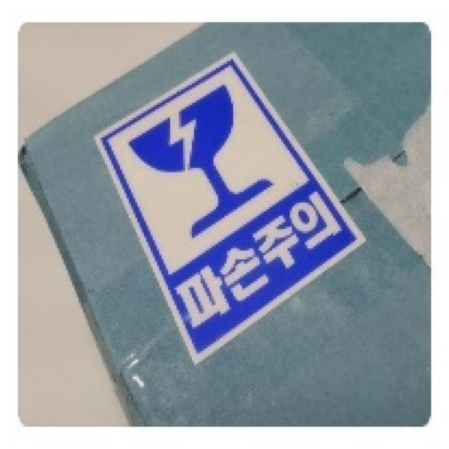

In [50]:
img_test = img_list[5]
show(img_test)

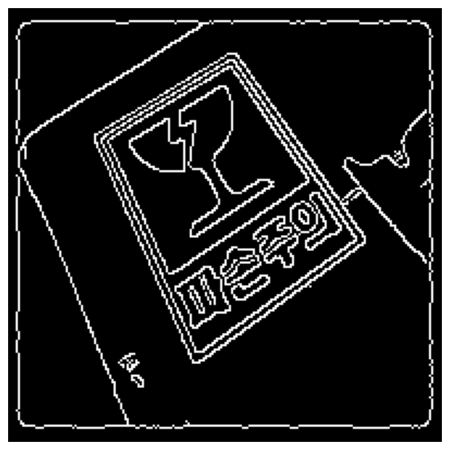

In [51]:
edges1 = cv2.Canny(img_test, 50,400)
show(edges1)

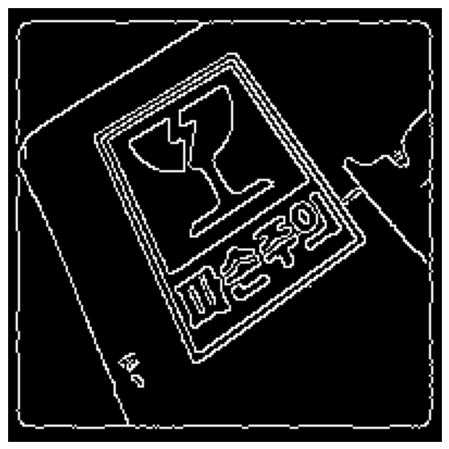

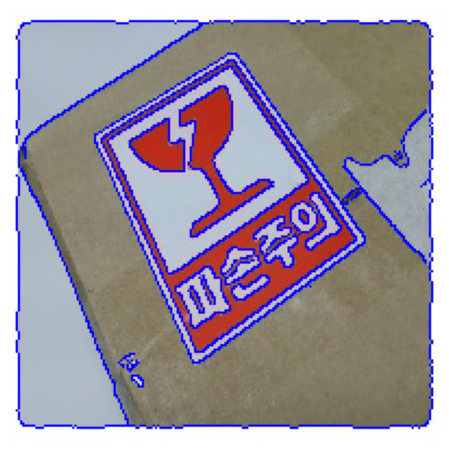

33


In [61]:
# images , cont, hier = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
test = img_list[5]
img_test = test.copy()
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
# show(img_test)
kernel = np.ones((3,3), np.uint8)
edges1 = cv2.Canny(img_test, 50,400)
# edges1 = cv2.erode(edges1, kernel, iterations=1)
# edges1 = cv2.dilate(edges1, kernel, iterations=1)
show(edges1)
contours, hierarchy = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = cv2.drawContours(img_test, contours, -1, (0,0,255),1)
show(cont)
print(len(contours))

maxLength 577.8305150270462
332


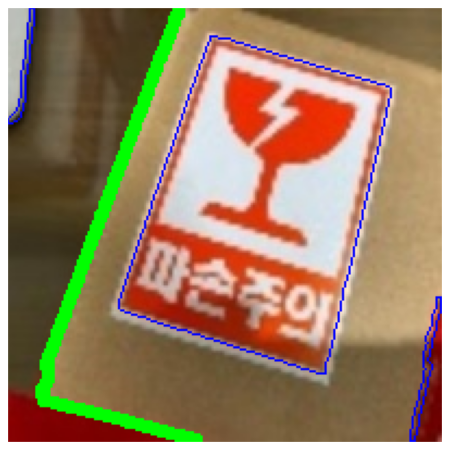

In [37]:
maxLength = 0
k=0
for i, cnt in enumerate (contours):
    perimeter = cv2.arcLength(cnt, closed = True)
    if perimeter > maxLength:
        maxLength = perimeter
        k=i
print('maxLength', maxLength)
cnt = contours[k]
dst2 = img_test.copy()
print(len(cnt))
cv2.drawContours(dst2,[cnt], 0, (0, 255, 0),2)
show(dst2)

14 0 75 200


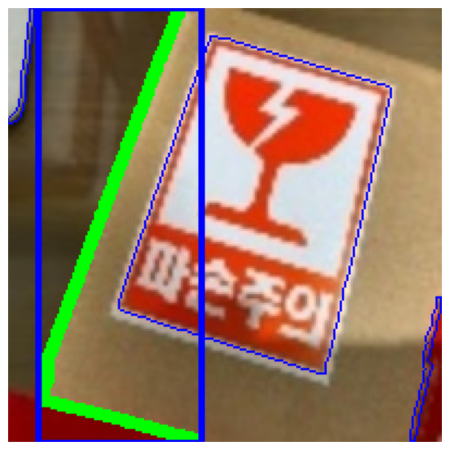

In [38]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
print(x, y, w, h)
dst3 = dst2.copy()
# cv2.rectangle(dst3, (x,y), (x+w,y+h), (0,0,255),2)
cv2.rectangle(dst3, (x,y), (x+w,y+h), (0,0,255),2)
# cv2.rectangle(dst3, (x,y), (59+60, 27+117), (0,255,0),1 )
show(dst3)

In [31]:
print(x, y, w, h)

39 9 122 182


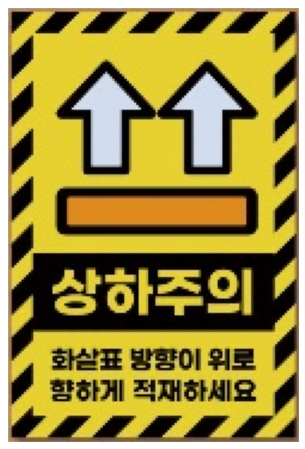

In [33]:
roi = img_list[-1][y:y+h, x:x+w]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
# print(roi)
show(roi)